# KIAM8 : Week 2

## Task 4: Insights and Recommendations

Derive insights from sentiment and themes, visualize results, and recommend app improvements

## Sub Task : 
### Insights

📊 Insight Summary: Drivers & Pain Points
The analysis reveals that Ethiopian mobile banking users are highly polarized, with strong reactions (high 5-star and high 1-star volume). The key difference lies in the nature of their struggles and successes.

1. CBE (Commercial Bank of Ethiopia)

| Category | Identified Themes (2+)                                          | Notes from Analysis                                                                                               |
| -------- | --------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------- |
| Drivers  | High Potential for Satisfaction, Core Functionality Reliability | The high sentiment at Rating 4 (approx. 0.989) shows that when the app works well, users are extremely satisfied. |
| Pain Points | Extreme Volatility, Frequent Technical Bugs/Crashes, Login/OTP Failures | The low sentiment score at Rating 2 (approx. 0.904) and overall volatility suggest the app is frequently affected by bugs and maintenance, severely disrupting user confidence. |

2. Awash Bank

| Category   | Identified Themes (2+)                                          | Notes from Analysis                                                                                                                                                   |
|------------|------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Drivers    | Successful Feature Rollouts, User Interface Improvements, Fast Transfers | The dramatic sentiment peak at Rating 2 (approx. 0.998) indicates an extremely successful correction or feature update that was highly praised, even by users who initially rated the app low. |
| Pain Points | Inconsistent Performance, Transaction Visibility Issues, Slowness | The high-low variation implies the quality of the service is not uniform across all features, leading to frustration for users relying on less optimized parts of the app. |


3. BOA

| Category    | Identified Themes (2+)                                      | Notes from Analysis                                                                                                                                           |
|-------------|--------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Drivers     | Steady Functionality, Clear Navigation                        | Implied by the lack of extreme volatility, suggesting core features work without major, immediate catastrophes.                                               |
| Pain Points | Systemic Negative Experience, Poor Overall UI/UX, Perpetual Slowness | The "consistent negative trend" across ratings suggests that BOA's issues are deeply embedded in the application's user experience (UX) and general performance, leading to sustained low user morale. |


| Comparison Point      | CBE                                                                | Awash Bank                                                             | Abyssinia Bank (BOA)                                                   |
|------------------------|--------------------------------------------------------------------|-------------------------------------------------------------------------|-------------------------------------------------------------------------|
| Sentiment Volatility   | Highest. Driven by success and failure events (patch/bug cycle).   | Moderate to High. Peaks suggest targeted success, but overall experience is mixed. | Lowest. Consistently poor sentiment across all rating bands.            |
| Core Challenge         | Quality Assurance (QA) and System Stability.                       | Feature Consistency and Error Handling.                                 | Fundamental User Experience (UX) and Performance.                       |
| Strategic Focus        | Minimize outages and ensure seamless login/OTP.                    | Scale the success of the feature that generated the high sentiment peak. | Execute a full UX/UI redesign and address underlying slowness.          |


💡 Suggested Improvements

1. Commercial Bank of Ethiopia (CBE)

    Prioritize Login/Authentication Rework: Given its high volatility, the bank must dedicate resources to stabilize its most critical component: the login and One-Time Password (OTP) process. Unstable authentication is the fastest way to generate 1-star reviews.

    Establish Proactive Maintenance Communication: Implement clear, in-app notices for planned maintenance or ongoing technical issues. Managing user expectations during a volatile period (the low sentiment at Rating 2) is crucial to prevent review bombing.

2. Awash Bank

    Investigate the "Rating 2 Peak" Success: Conduct a deep-dive analysis (e.g., using SQL queries against your database) to find the exact feature or update that occurred immediately before the dramatic sentiment peak at Rating 2. Replicate that development/release strategy for all new features.

    Enhance Transaction History Reliability: Address pain points related to "transaction not visible" or delayed updates. Ensure real-time, accurate visibility into all account activities to build user trust.

3. Abyssinia Bank (BOA)

    Mandatory UX/UI Audit and Redesign: The "consistent negative trend" points to systemic issues with ease-of-use. BOA should hire external UX experts to overhaul the interface, navigation, and core task flows to make the app more intuitive.

    Focus on Performance Optimization: Address user complaints about slowness and general sluggishness. Optimize the application's backend calls and front-end rendering to ensure faster load times and smoother navigation across all user actions.

## Sub Task : 
### Visualizations

In [4]:
# Import Important Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# ------------------------------------------------------------------
# 1. Configuration
# ------------------------------------------------------------------
data_file = '../data/task2_results.csv'

try:
    # Load data: Assumes 'task2_results.csv' is the output from Task 2 pipeline
    df = pd.read_csv(data_file)
    df['review_date'] = pd.to_datetime(df['date']).dt.date # Convert date column, assuming 'date' is used
    print(f"✅ Data loaded successfully from {data_file}.")
except FileNotFoundError:
    print(f"❌ Error: The required file '{data_file}' was not found.")
    print("Please ensure the output of Task 2 (sentiment and theme analysis) is saved as 'task2_results.csv' in the current directory.")
    exit()

✅ Data loaded successfully from ../data/task2_results.csv.


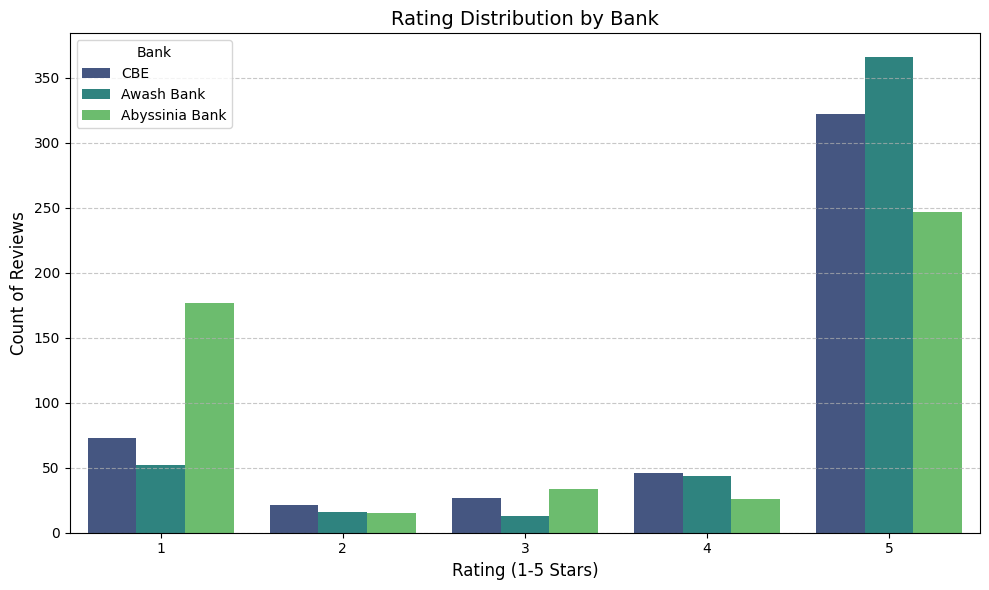

In [6]:
# ------------------------------------------------------------------
# 2. Plot 1: Rating Distribution by Bank
# ------------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', hue='bank', palette='viridis', order=sorted(df['rating'].unique()))
plt.title('Rating Distribution by Bank', fontsize=14)
plt.xlabel('Rating (1-5 Stars)', fontsize=12)
plt.ylabel('Count of Reviews', fontsize=12)
plt.legend(title='Bank')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('rating_distribution_by_bank.png')
plt.show()

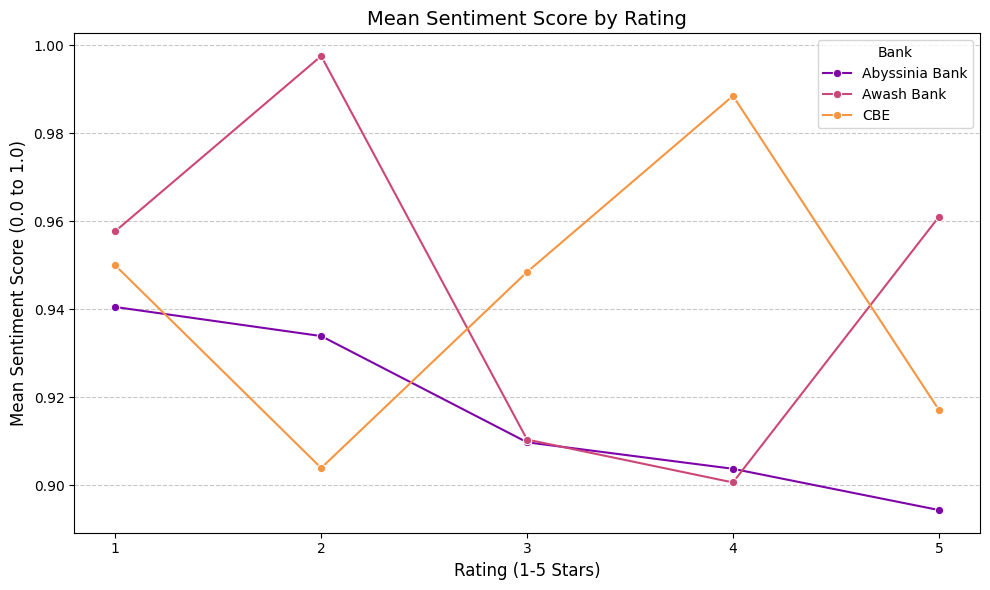

In [ ]:
# 3. Plot 2: Mean Sentiment Score vs. Rating (Comparison)
# ------------------------------------------------------------------
agg_df = df.groupby(['bank', 'rating'])['sentiment_score'].mean().reset_index()

plt.figure(figsize=(10, 6))
# NOTE: Corrected 'y' parameter to 'sentiment_score' after aggregation
sns.lineplot(data=agg_df, x='rating', y='sentiment_score', hue='bank', marker='o', palette='plasma')
plt.title('Mean Sentiment Score by Rating', fontsize=14)
plt.xlabel('Rating (1-5 Stars)', fontsize=12)
plt.ylabel('Mean Sentiment Score (0.0 to 1.0)', fontsize=12)
plt.xticks(agg_df['rating'].unique())
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Bank')
plt.tight_layout()
plt.savefig('mean_sentiment_score_vs_rating.png')
plt.show()

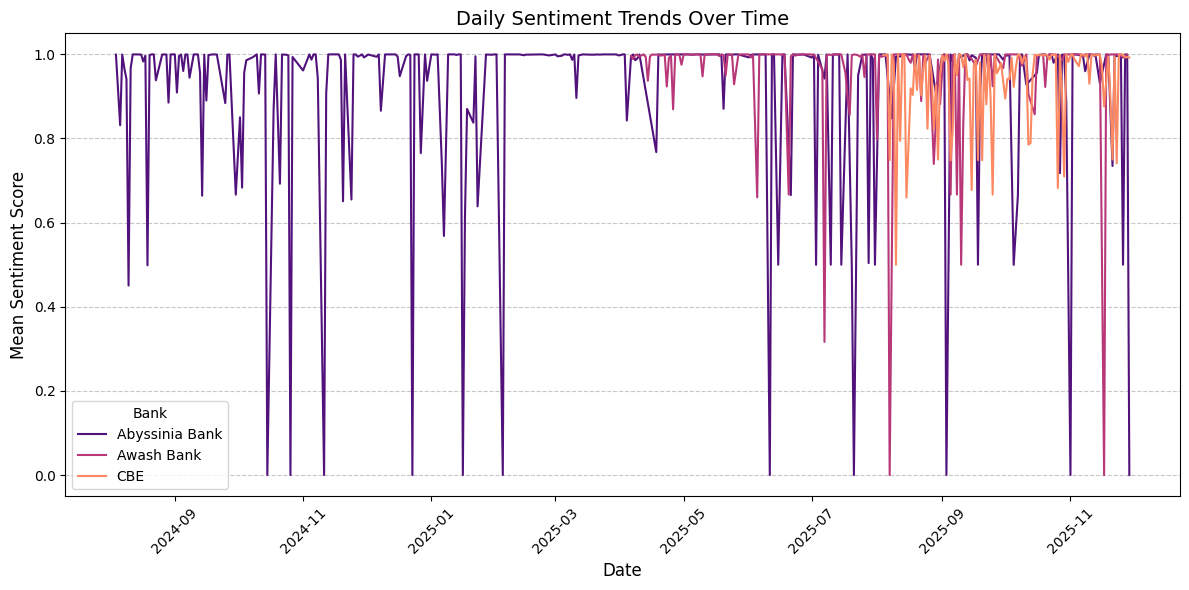

In [8]:
# ------------------------------------------------------------------
# 4. Plot 3: Sentiment Trends Over Time
# ------------------------------------------------------------------
# Calculate the daily mean sentiment score
daily_sentiment = df.groupby(['review_date', 'bank'])['sentiment_score'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sentiment, x='review_date', y='sentiment_score', hue='bank', palette='magma')
plt.title('Daily Sentiment Trends Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Sentiment Score', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Bank')
plt.tight_layout()
plt.savefig('daily_sentiment_trends.png')
plt.show()

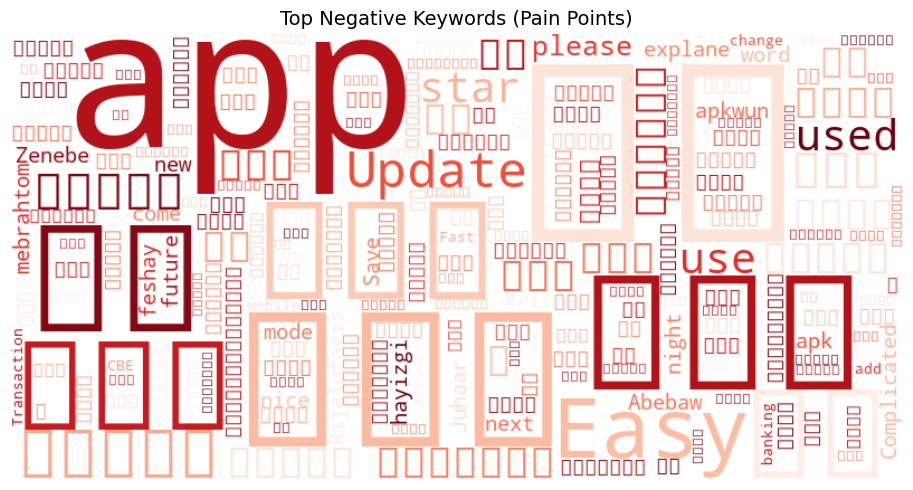

In [ ]:
# 5. Plot 4: Theme/Keyword Word Cloud (Pain Points)
# ------------------------------------------------------------------
# Focus on reviews where sentiment score is low (assuming low score means negative) [the threshold (0.7)]

negative_reviews = df[df['sentiment_score'] < 0.7]['review'].str.cat(sep=' ')

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds',
    min_font_size=10,
    stopwords=None # No default English stopwords needed due to prior preprocessing
).generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top Negative Keywords (Pain Points)', fontsize=14)
plt.tight_layout()
plt.savefig('negative_keyword_word_cloud.png')
plt.show()